# 데이터 수집

### 필요 라이브러리 import

In [6]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


### 삼성전자 주가 가져오기

In [215]:
# 2.7%
# df = fdr.DataReader('005930', '2023-01-01', '2024-03-29')

#0.5%
df = fdr.DataReader('005930', '2023-03-01', '2024-03-29')


# index 제거
df.reset_index(inplace=True)

# colum 명 변경 -> ds, y
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df = df[['ds','y']]

print(df)

# 기간 필터링
demands = df.loc[df.ds <= '2024-03-24']
demands.info()
demands

test_demands = df.loc[df.ds >= '2024-03-25']
test_demands.info()
test_demands

            ds      y
0   2023-03-02  60800
1   2023-03-03  60500
2   2023-03-06  61500
3   2023-03-07  60700
4   2023-03-08  60300
..         ...    ...
261 2024-03-25  78200
262 2024-03-26  79900
263 2024-03-27  79800
264 2024-03-28  80800
265 2024-03-29  82400

[266 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      261 non-null    datetime64[ns]
 1   y       261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 261 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5 non-null      datetime64[ns]
 1   y       5 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 120.0 bytes


,ds,y
261,2024-03-25,78200
262,2024-03-26,79900
263,2024-03-27,79800
264,2024-03-28,80800
265,2024-03-29,82400


<Axes: >

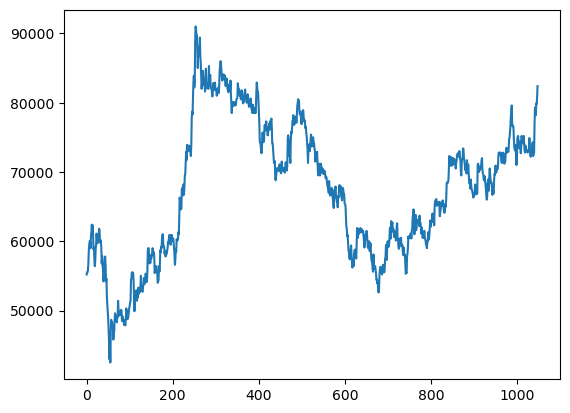

In [83]:
df['y'].plot()

### 전처리

03:42:34 - cmdstanpy - INFO - Chain [1] start processing
03:42:35 - cmdstanpy - INFO - Chain [1] done processing


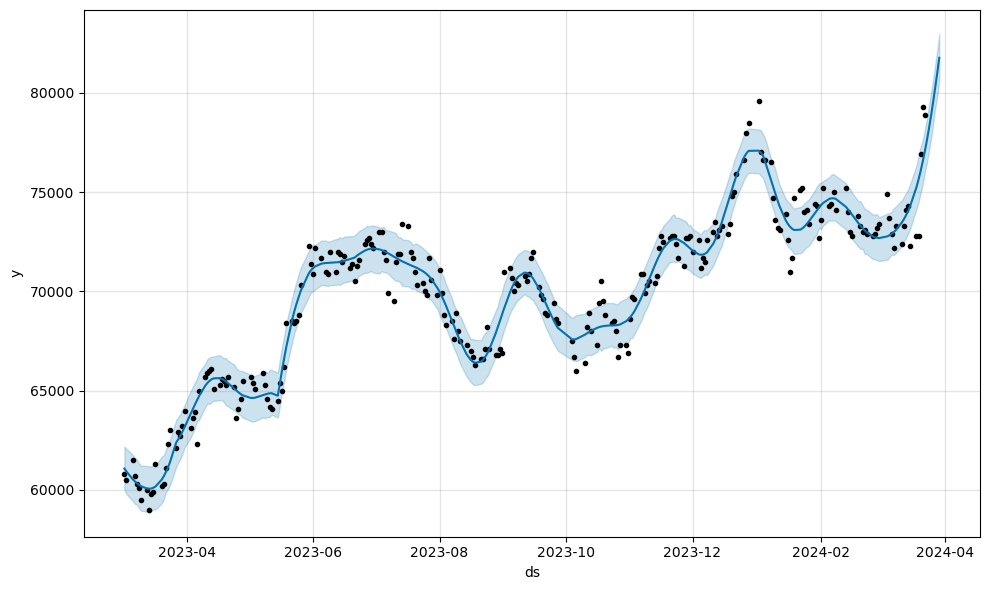

In [217]:
#https://unfinishedgod.netlify.app/2021/04/21/python-%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1/

# https://wikidocs.net/233162

# https://velog.io/@euisuk-chung/Prophet%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%98%88%EC%B8%A1

#필요한 패키지 불러오기
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

#데이터
# df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# print(df)

#모델 피팅
# pro = Prophet(changepoint_prior_scale=0.05)

# 2.7%
pro = Prophet(
                # seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=False,
                 daily_seasonality=False,
                 changepoint_prior_scale=0.5)

#0.5%
pro = Prophet(
                seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=False,
                 daily_seasonality=False,
                 changepoint_prior_scale=0.5)

# demands.loc[demands['y'] > 80000, 'y'] = None
# demands['cap'] = 90000
# pro = Prophet(    changepoint_prior_scale=0.05,
#     yearly_seasonality=10,
#     daily_seasonality=False)
# pro.add_seasonality(name='weekly', period=5, fourier_order=5)

pro.fit(demands)

#예측
# future = pro.make_future_dataframe(periods=14)
future = pro.make_future_dataframe(periods = 7, freq = 'd')
# future['cap'] = 90000

forecast = pro.predict(future)

#시각화
fig1 = pro.plot(forecast)

#분해 시각화
# fig2 = pro.plot_components(forecast)

[[<matplotlib.lines.Line2D at 0x2494120cfd0>],

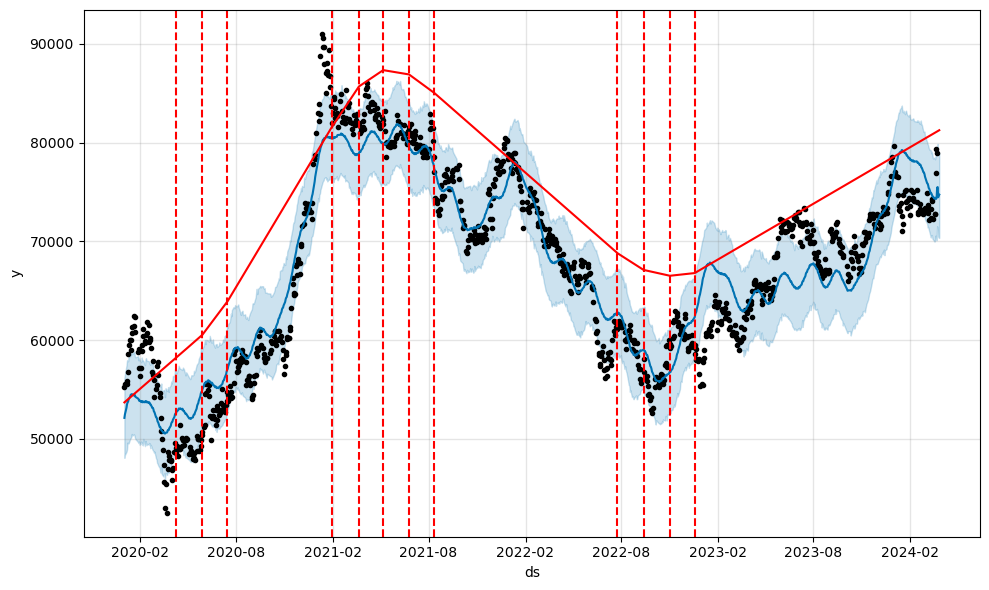

In [88]:
from prophet.plot import add_changepoints_to_plot

fig = pro.plot(forecast)
add_changepoints_to_plot(fig.gca(), pro, forecast)

In [218]:
pred = forecast.tail(5)[['ds','yhat']]
# pred.drop(pred[
#     (pred['ds'] =='2024-02-17') | 
#     (pred['ds'] =='2024-02-18') | 
#     (pred['ds'] =='2024-02-24') | 
#     (pred['ds'] =='2024-02-25') 
#     ].index, inplace=True)
pred

,ds,yhat
263,2024-03-25,78824.766296
264,2024-03-26,79504.448191
265,2024-03-27,80223.392937
266,2024-03-28,80978.989422
267,2024-03-29,81768.004551


C:\Users\KwanhoKIm\AppData\Local\Temp\ipykernel_30136\4059526960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_demands['yhat'] = pred['yhat'].to_list()


<Axes: >

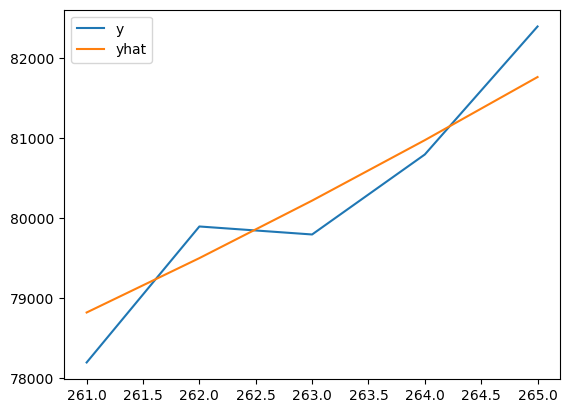

In [219]:
test_demands['yhat'] = pred['yhat'].to_list()
test_demands[['y','yhat']].plot()

In [220]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE


print('MSE:', MSE(pred['yhat'].to_list(), test_demands['y'].to_list()))
print('MAE:', MAE(pred['yhat'].to_list(), test_demands['y'].to_list()))
print('MAPE:', MAPE(pred['yhat'].to_list(), test_demands['y'].to_list()))

MSE: 231502.2395937185
MAE: 450.93918269097924
MAPE: 0.005623670753790906
